In [1]:
#xarray used to open the datasets
#matplotlib and ccrs used for plots and maps to make the data visual
#datetime will be used to convert the hour steps to datetime float instead of objects
    #once i figure that out

import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point
import matplotlib.pyplot as plt


In [2]:
file1='/scratch/ldoyle4/subset/ts.nc'
ds_ts = xr.open_dataset(file1)

In [3]:
file2='/scratch/ldoyle4/subset/precip.nc'
ds_precip = xr.open_dataset(file2)

In [4]:
file3='/scratch/ldoyle4/subset/z500.nc'
ds_z500 = xr.open_dataset(file3)

In [5]:
ds_ts

<xarray.Dataset>
Dimensions:    (time: 558, latitude: 53, longitude: 89)
Coordinates:
  * time       (time) datetime64[ns] 2011-08-01 2011-08-02 ... 2016-10-31
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0
Data variables:
    ts         (time, latitude, longitude) float64 ...
Attributes:
    history:                   Mon Oct 10 18:10:15 2022: ncatted -a calendar,...
    NCO:                       netCDF Operators version 4.7.5 (Homepage = htt...
    nco_openmp_thread_number:  1

In [6]:
ds_precip

<xarray.Dataset>
Dimensions:    (time: 558, latitude: 53, longitude: 89)
Coordinates:
  * time       (time) datetime64[ns] 2011-08-01 2011-08-02 ... 2016-10-31
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0
Data variables:
    precip     (time, latitude, longitude) float64 ...
Attributes:
    history:                   Mon Oct 10 17:38:35 2022: ncatted -a calendar,...
    NCO:                       netCDF Operators version 4.7.5 (Homepage = htt...
    nco_openmp_thread_number:  1

In [7]:
ds_z500

<xarray.Dataset>
Dimensions:    (time: 558, latitude: 53, longitude: 89)
Coordinates:
  * time       (time) datetime64[ns] 2011-08-01 2011-08-02 ... 2016-10-31
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0
Data variables:
    z500       (time, latitude, longitude) float64 ...
Attributes:
    history:                   Mon Oct 10 18:35:55 2022: ncatted -a calendar,...
    NCO:                       netCDF Operators version 4.7.5 (Homepage = htt...
    nco_openmp_thread_number:  1

Text(0.5, 1.0, '8-01-2011 surface temp')

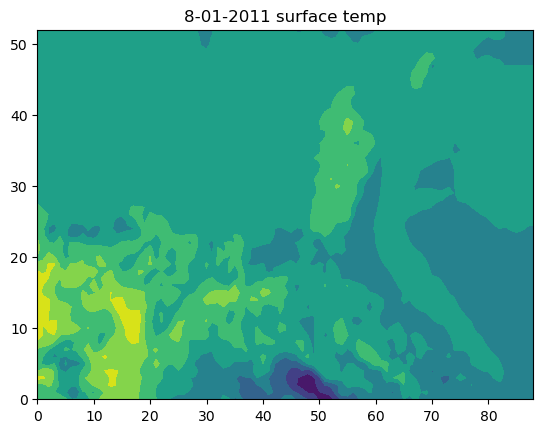

In [8]:
plt.contourf(ds_ts['ts'][0,:,:])
plt.title('8-01-2011 surface temp')

Text(0.5, 1.0, '8-01-2011 precipitation')

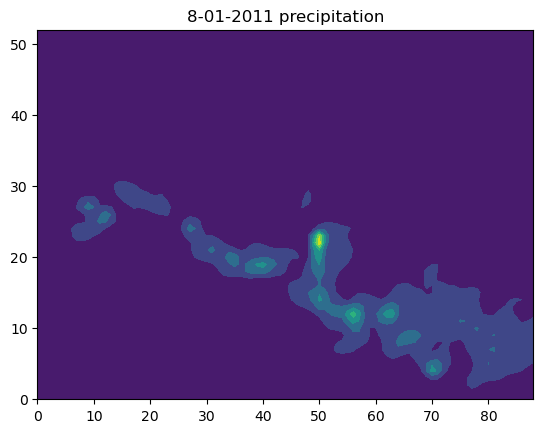

In [9]:
plt.contourf(ds_precip['precip'][0,:,:])
plt.title('8-01-2011 precipitation')

Text(0.5, 1.0, '8-01-2011 500 hPa Geopotential Height')

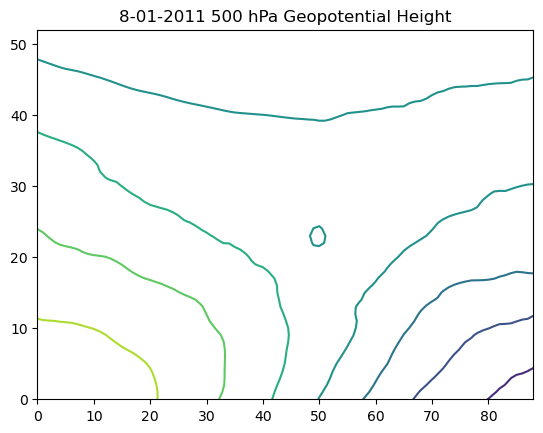

In [10]:
plt.contour(ds_z500['z500'][0,:,:])
plt.title('8-01-2011 500 hPa Geopotential Height')

In [11]:
ts_mean=ds_ts.mean(dim='time')

''

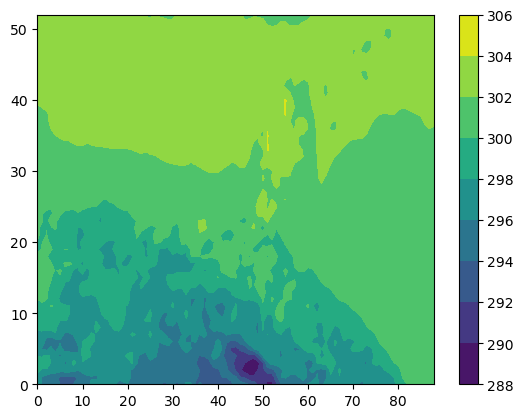

In [12]:
plt.contourf(ts_mean['ts'])
plt.colorbar() 
;

In [13]:
precip_mean=ds_precip.mean(dim='time')

''

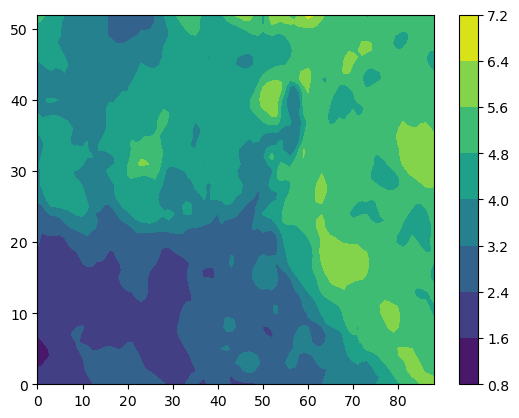

In [14]:
plt.contourf(precip_mean['precip'])
plt.colorbar() 
;

In [15]:
z500_mean=ds_z500.mean(dim='time')

''

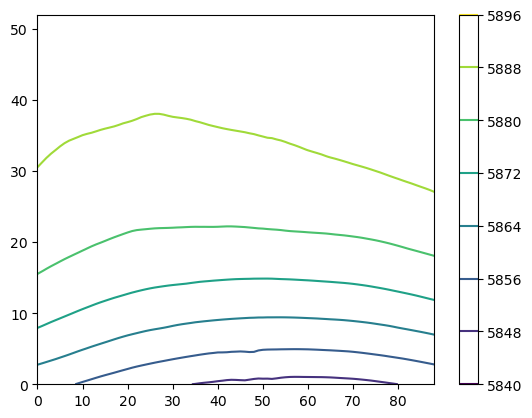

In [16]:
plt.contour(z500_mean['z500'])
plt.colorbar() 
;

''

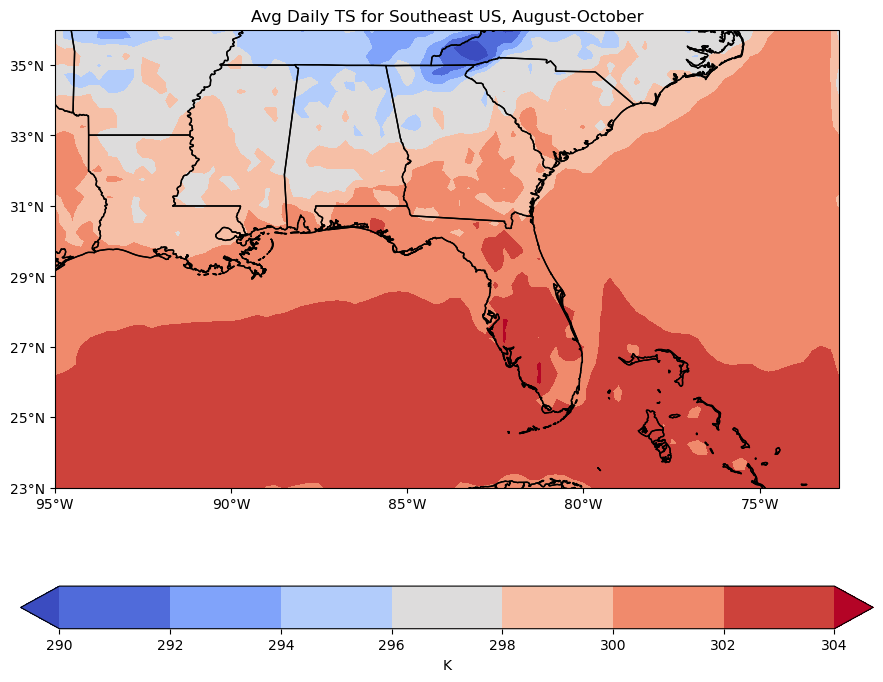

In [49]:
#plot the map for temperature
fig = plt.figure(figsize=(11,8.5))

ax=plt.axes(projection=ccrs.PlateCarree())

#add cyclic point to data
data=ts_mean['ts']
data, lons = add_cyclic_point(data, coord=ds_ts['longitude'])

cs=ax.contourf(lons, ds_ts['latitude'], data, 
            transform = ccrs.PlateCarree(),cmap='coolwarm', extend='both')

ax.set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.coastlines()
        
ax.add_feature(feature.STATES)

cbar = plt.colorbar(cs, orientation='horizontal',label='K') 

plt.title('Avg Daily TS for Southeast US, August-October')
;

''

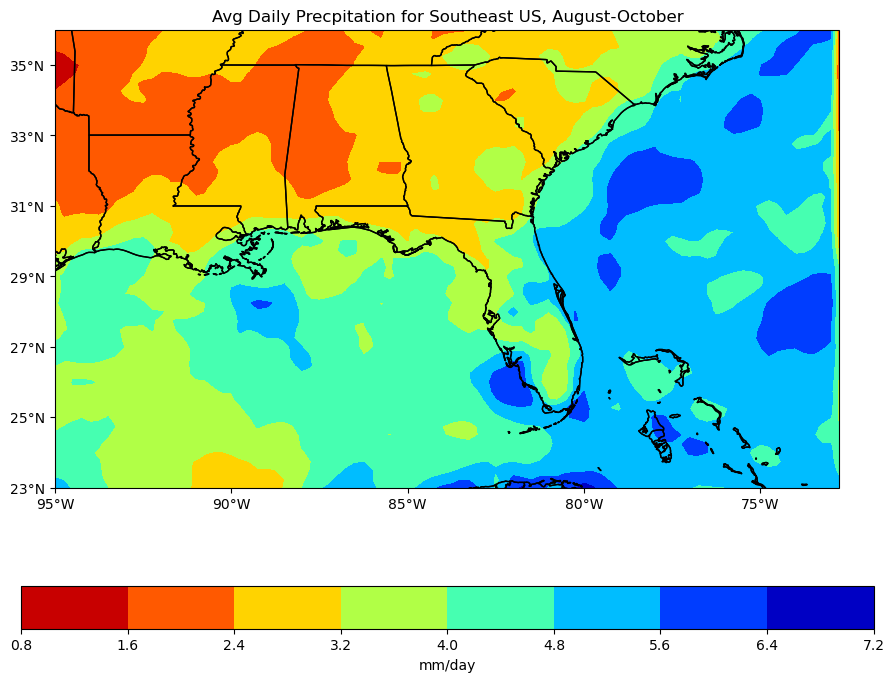

In [48]:
#plot the map for temperature
fig = plt.figure(figsize=(11,8.5))

ax=plt.axes(projection=ccrs.PlateCarree())

#add cyclic point to data
data=precip_mean['precip']
data, lons = add_cyclic_point(data, coord=ds_precip['longitude'])

cs=ax.contourf(lons, ds_precip['latitude'], data, 
            transform = ccrs.PlateCarree(),cmap='jet_r')

ax.set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.coastlines()
        
ax.add_feature(feature.STATES)


cbar = plt.colorbar(cs, orientation='horizontal',label='mm/day') 

plt.title('Avg Daily Precpitation for Southeast US, August-October')
;

''

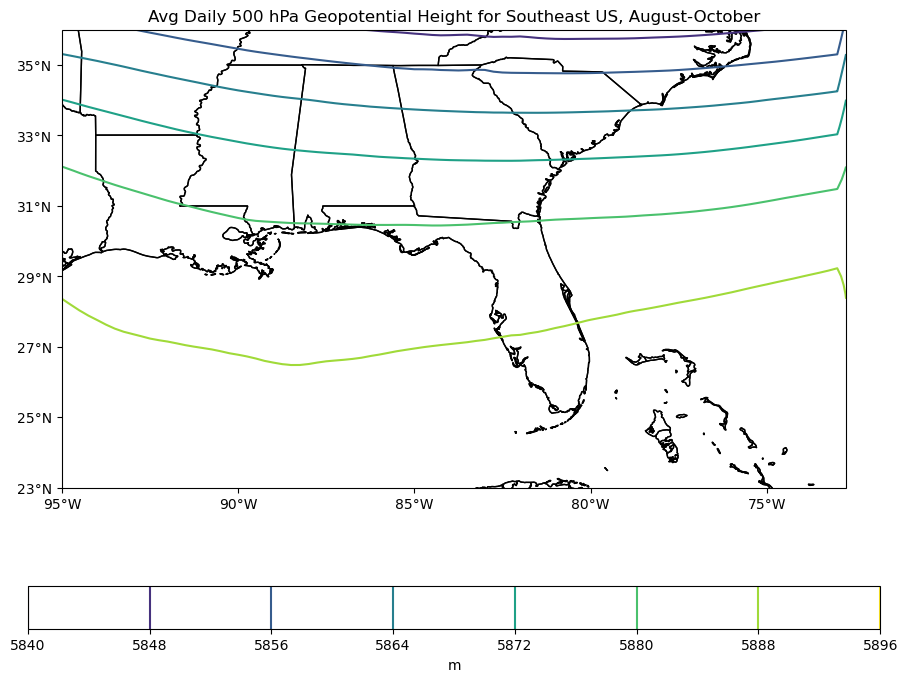

In [47]:
#plot the map for temperature
fig = plt.figure(figsize=(11,8.5))

ax=plt.axes(projection=ccrs.PlateCarree())

#add cyclic point to data
data=z500_mean['z500']
data, lons = add_cyclic_point(data, coord=ds_z500['longitude'])

cs=ax.contour(lons, ds_z500['latitude'], data, 
            transform = ccrs.PlateCarree(),cmap='viridis')


ax.set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.coastlines()
        
ax.add_feature(feature.STATES)


cbar = plt.colorbar(cs, orientation='horizontal',label='m') 

plt.title('Avg Daily 500 hPa Geopotential Height for Southeast US, August-October')
;

# Climatology

### Surface Temperature Climatology: Yearly and Monthly

In [20]:
ts_clim_year = ds_ts.groupby('time.year').mean()

In [21]:
ts_clim_year

<xarray.Dataset>
Dimensions:    (year: 6, latitude: 53, longitude: 89)
Coordinates:
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0
  * year       (year) int64 2011 2012 2013 2014 2015 2016
Data variables:
    ts         (year, latitude, longitude) float64 297.7 296.9 ... 302.1 302.1

Text(0.5, 0.98, 'Surface Temperature Yearly Climatology from UFS Protoype 7')

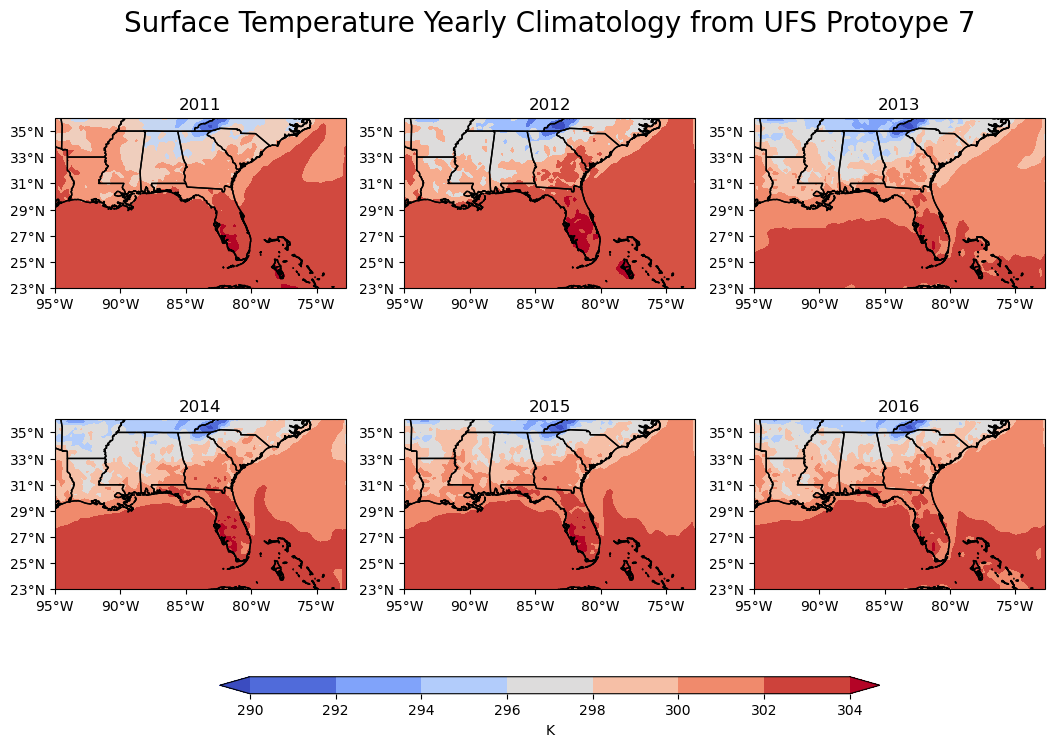

In [45]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))
  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i,year in enumerate(ts_clim_year['year']):

        # Select the season
        data=ts_clim_year['ts'].sel(year=year)

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=ts_clim_year['longitude'])

        # Contour plot
        cs=axs[i].contourf(lons,ts_clim_year['latitude'],data,
                          transform = ccrs.PlateCarree(),
                          cmap='coolwarm',extend='both')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(year.values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='K')

# Add a big title at the top
plt.suptitle('Surface Temperature Yearly Climatology from UFS Protoype 7',fontsize=20)


In [23]:
ts_clim_month = ds_ts.groupby('time.month').mean()

In [24]:
ts_clim_month

<xarray.Dataset>
Dimensions:    (month: 3, latitude: 53, longitude: 89)
Coordinates:
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0
  * month      (month) int64 8 9 10
Data variables:
    ts         (month, latitude, longitude) float64 303.0 301.7 ... 301.9 301.9

Text(0.5, 0.98, 'Surface Temperature Monthly Climatology from UFS Protoype 7')

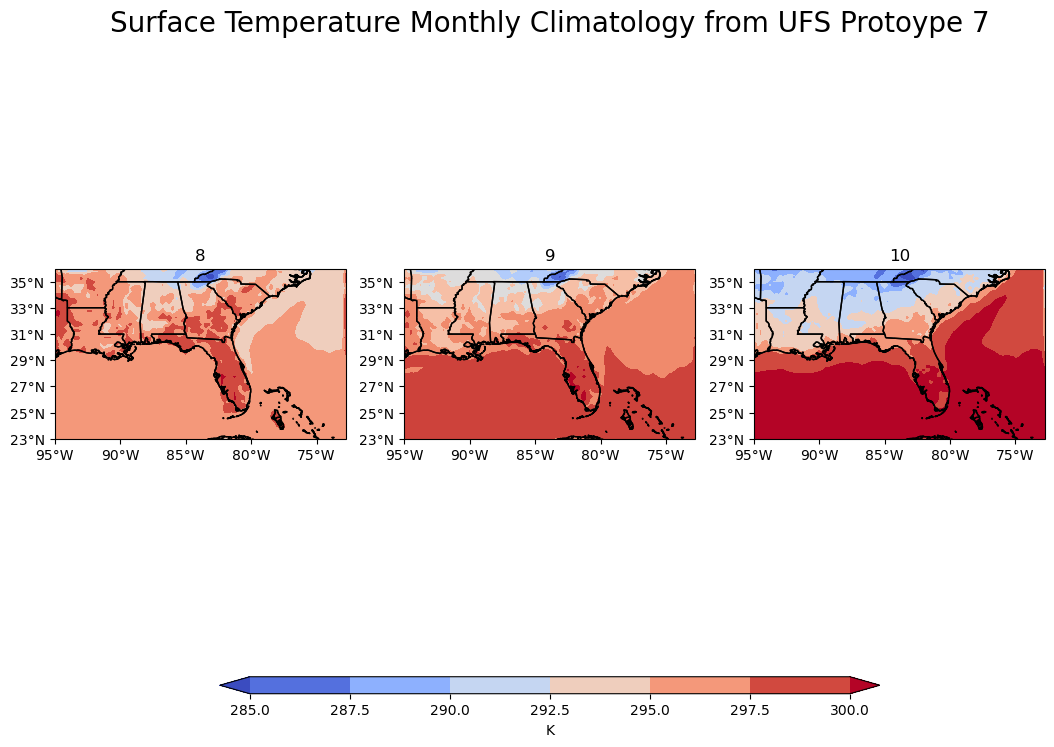

In [44]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=1,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))
  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i,month in enumerate(ts_clim_month['month']):

        # Select the season
        data=ts_clim_month['ts'].sel(month=month)

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=ts_clim_month['longitude'])

        # Contour plot
        cs=axs[i].contourf(lons,ts_clim_month['latitude'],data,
                          transform = ccrs.PlateCarree(),
                          cmap='coolwarm',extend='both')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter) 

        # Title each subplot with the name of the season
        axs[i].set_title(month.values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='K')

# Add a big title at the top
plt.suptitle('Surface Temperature Monthly Climatology from UFS Protoype 7',fontsize=20)


### Precipitation Climatology: Yearly and Monthly

In [26]:
precip_clim_year = ds_precip.groupby('time.year').mean()

In [27]:
precip_clim_year

<xarray.Dataset>
Dimensions:    (year: 6, latitude: 53, longitude: 89)
Coordinates:
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0
  * year       (year) int64 2011 2012 2013 2014 2015 2016
Data variables:
    precip     (year, latitude, longitude) float64 0.7915 0.6595 ... 5.516 5.347

Text(0.5, 0.98, 'Precipitation Yearly Climatology from UFS Protoype 7')

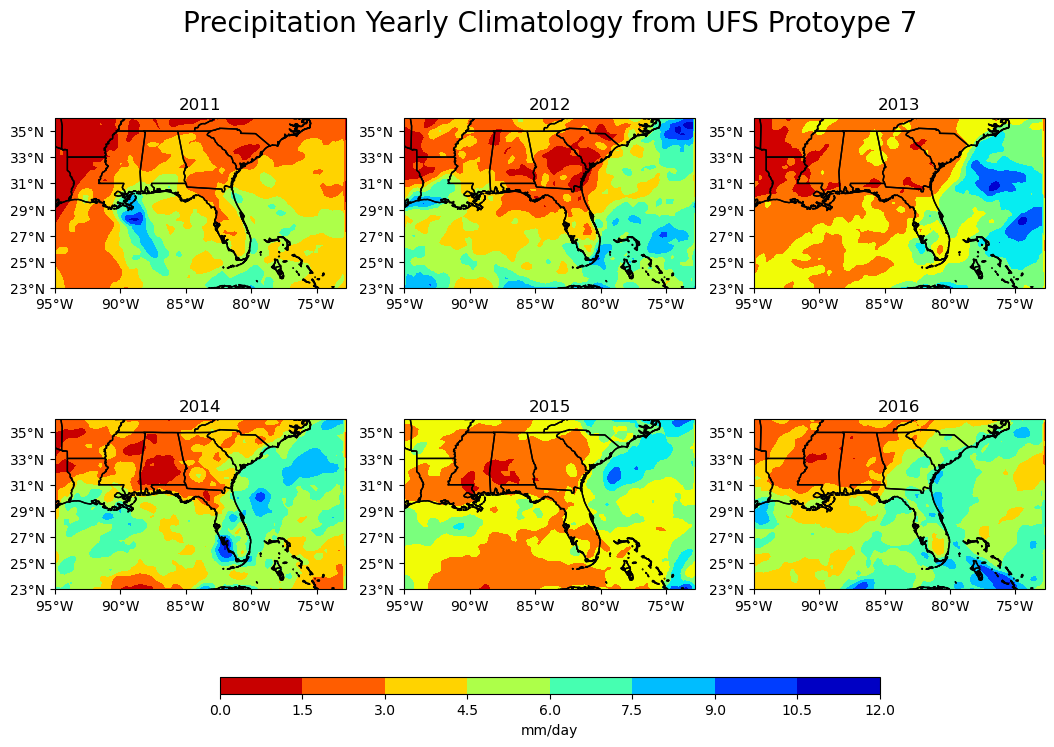

In [42]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))
  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i,year in enumerate(precip_clim_year['year']):

        # Select the season
        data=precip_clim_year['precip'].sel(year=year)

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=precip_clim_year['longitude'])

        # Contour plot
        cs=axs[i].contourf(lons,precip_clim_year['latitude'],data,
                          transform = ccrs.PlateCarree(),
                          cmap='jet_r')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(year.values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        axs[i].add_feature(feature.STATES)
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('Precipitation Yearly Climatology from UFS Protoype 7',fontsize=20)


In [29]:
precip_clim_month = ds_precip.groupby('time.month').mean()

In [30]:
precip_clim_month

<xarray.Dataset>
Dimensions:    (month: 3, latitude: 53, longitude: 89)
Coordinates:
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0
  * month      (month) int64 8 9 10
Data variables:
    precip     (month, latitude, longitude) float64 0.8187 0.812 ... 9.511 8.282

Text(0.5, 0.98, 'Precipitation Monthly Climatology from UFS Protoype 7')

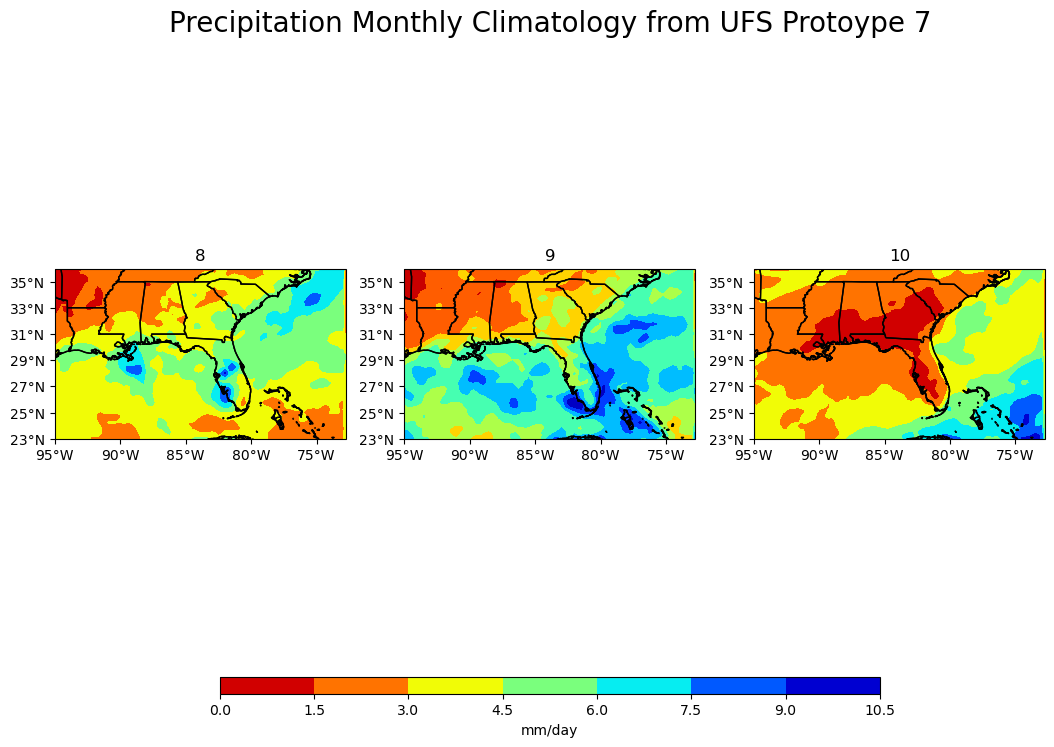

In [40]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=1,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))
  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i,month in enumerate(precip_clim_month['month']):

        # Select the season
        data=precip_clim_month['precip'].sel(month=month)

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=precip_clim_month['longitude'])

        # Contour plot
        cs=axs[i].contourf(lons,precip_clim_month['latitude'],data,
                          transform = ccrs.PlateCarree(),
                          cmap='jet_r')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(month.values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
        axs[i].add_feature(feature.STATES)
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('Precipitation Monthly Climatology from UFS Protoype 7',fontsize=20)


### Z500 Climatology: Yearly and Monthly

In [32]:
z500_clim_year = ds_z500.groupby('time.year').mean()

In [33]:
z500_clim_year

<xarray.Dataset>
Dimensions:    (year: 6, latitude: 53, longitude: 89)
Coordinates:
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0
  * year       (year) int64 2011 2012 2013 2014 2015 2016
Data variables:
    z500       (year, latitude, longitude) float64 5.859e+03 ... 5.893e+03

Text(0.5, 0.98, '500 hPa Geopotential Height Year Climatology from UFS Protoype 7')

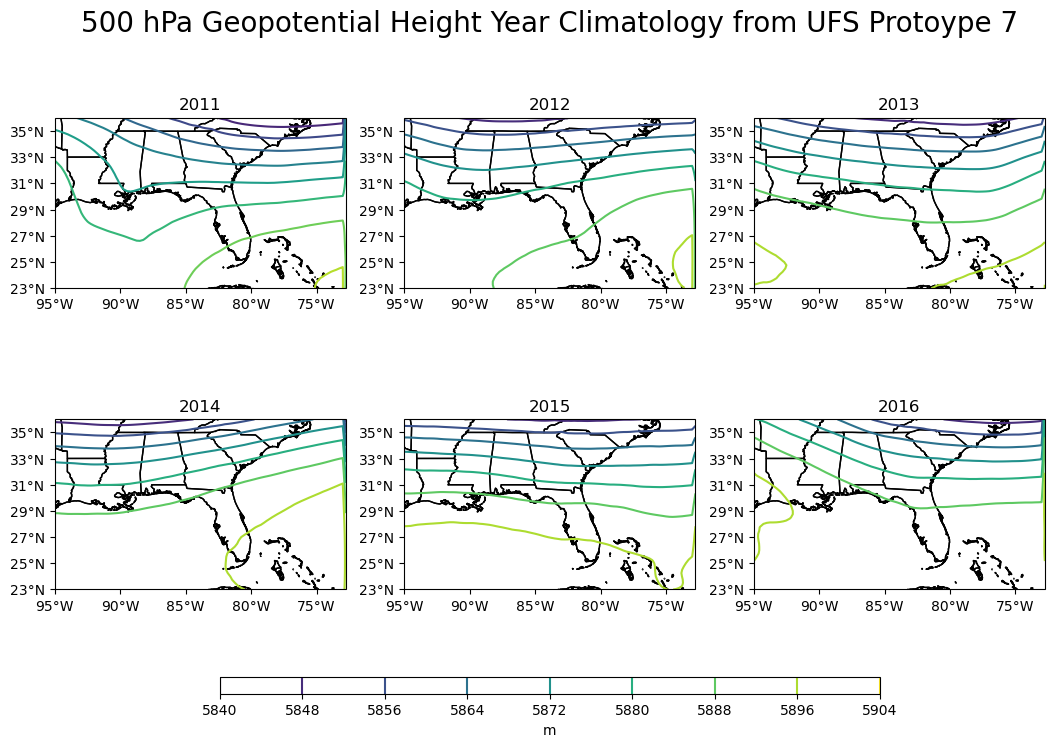

In [52]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))
  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i,year in enumerate(z500_clim_year['year']):

        # Select the season
        data=z500_clim_year['z500'].sel(year=year)

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=z500_clim_year['longitude'])

        # Contour plot
        cs=axs[i].contour(lons,z500_clim_year['latitude'],data,
                          transform = ccrs.PlateCarree(),
                          cmap='viridis')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)
        # Title each subplot with the name of the season
        axs[i].set_title(year.values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='m')

# Add a big title at the top
plt.suptitle('500 hPa Geopotential Height Year Climatology from UFS Protoype 7',fontsize=20)


In [35]:
z500_clim_month = ds_z500.groupby('time.month').mean()

In [36]:
z500_clim_month

<xarray.Dataset>
Dimensions:    (month: 3, latitude: 53, longitude: 89)
Coordinates:
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0
  * month      (month) int64 8 9 10
Data variables:
    z500       (month, latitude, longitude) float64 5.919e+03 ... 5.877e+03

Text(0.5, 0.98, '500 hPa Geopotential Height Monthly Climatology from UFS Protoype 7')

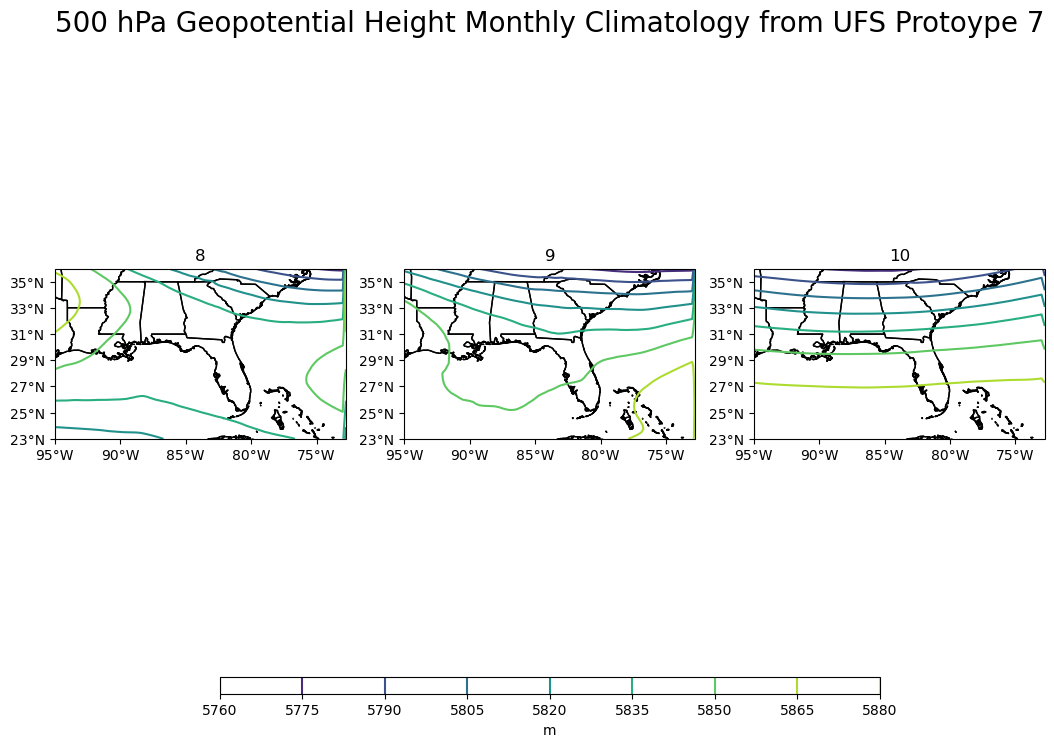

In [53]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=1,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))
  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i,month in enumerate(z500_clim_month['month']):

        # Select the season
        data=z500_clim_month['z500'].sel(month=month)

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=z500_clim_month['longitude'])

        # Contour plot
        cs=axs[i].contour(lons,z500_clim_month['latitude'],data,
                          transform = ccrs.PlateCarree(),
                          cmap='viridis')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)
    

        # Title each subplot with the name of the season
        axs[i].set_title(month.values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='m')

# Add a big title at the top
plt.suptitle('500 hPa Geopotential Height Monthly Climatology from UFS Protoype 7',fontsize=20)


# Anomalies

## Surface Temperature Anomalies

### Time Series

In [54]:
ts_mon1 = ds_ts.resample(time="MS").mean()

In [55]:
def is_ASO(month):
    return (month >= 8) & (month <= 10)
ts_monthly = ts_mon1.sel(time=is_ASO(ts_mon1['time.month']))

In [68]:
#to plot anomalies as time series:
regional_avg_ts = np.mean(ds_ts.ts[:,:,:],axis=(1,2))

In [69]:
avg_ts = np.mean(regional_avg_ts[:])

In [70]:
ts_anomaly = regional_avg_ts - avg_ts

In [78]:
ts_anomaly

<xarray.DataArray 'ts' (time: 558)>
array([ 2.58079984e+00,  3.13313565e+00,  3.67637894e+00,  3.92812123e+00,
        3.55516232e+00,  3.10708325e+00,  3.25418389e+00,  3.12647175e+00,
        2.69920169e+00,  2.12474040e+00,  2.11779640e+00,  2.03093558e+00,
        2.31783349e+00,  2.92266868e+00,  3.25220887e+00,  2.90118184e+00,
        2.46880918e+00,  2.01513732e+00,  2.11905495e+00,  2.16490207e+00,
        2.18909472e+00,  2.38717790e+00,  2.31795199e+00,  2.10989226e+00,
        2.23918297e+00,  2.46129610e+00,  2.49070976e+00,  1.63289174e+00,
        7.48095545e-01,  5.47035300e-01,  1.28879072e+00,  1.77455819e+00,
        1.92699087e+00,  1.31323146e+00,  3.47647612e-01, -3.02471352e-01,
       -9.58135222e-01, -1.44597663e+00, -1.24380748e+00, -1.15433469e+00,
       -7.95464130e-01, -3.03505461e-01,  1.06732330e-01, -3.50248688e-01,
       -1.08678408e+00, -9.57044071e-01, -8.91346687e-01, -8.29827733e-01,
       -4.63423139e-01, -6.34446796e-02,  6.41868388e-02,  7.38480947e-04,
       -4.43294734e-02, -1.13507989e-01,  3.53940230e-02,  1.30549737e-01,
        4.40887316e-03, -3.36171423e-01, -4.76467927e-01, -6.34885243e-01,
       -1.01949408e+00, -1.40001178e+00, -2.92177418e+00, -3.75443103e+00,
       -3.49446371e+00, -2.90870100e+00, -2.53862008e+00, -2.30066447e+00,
       -1.89716260e+00, -1.84005795e+00, -2.32963763e+00, -2.49301575e+00,
       -2.15364883e+00, -2.38542322e+00, -4.21858999e+00, -5.60655802e+00,
       -5.19272448e+00, -4.71175602e+00, -4.17435002e+00, -3.95036733e+00,
...
        1.41776505e+00,  1.83169049e+00,  2.34494820e+00,  1.98924456e+00,
        2.16787977e+00,  2.41477023e+00,  2.53837726e+00,  2.47608074e+00,
        2.41047532e+00,  2.44191979e+00,  2.48688220e+00,  2.59329372e+00,
        2.59239213e+00,  2.41639647e+00,  2.50666185e+00,  2.86801508e+00,
        1.57528385e+00,  7.36622943e-01,  4.68131689e-01,  8.23960523e-01,
        1.58859535e+00,  1.92299327e+00,  2.04208519e+00,  2.16598567e+00,
        2.23981916e+00,  2.00098212e+00,  1.83321566e+00,  1.85692701e+00,
        2.89089370e-01, -1.24671423e+00, -1.10633959e+00, -3.09795823e-01,
        2.66356264e-01,  4.03135014e-01, -2.05626835e-02, -7.91399813e-01,
       -4.19369086e-01,  1.71479616e-01,  8.54123101e-01,  1.09798104e+00,
        9.71293290e-01,  6.30276756e-01,  3.08561059e-01, -1.54190329e-01,
       -5.99631178e-01, -7.22263521e-02,  4.25224230e-01, -1.06453255e+00,
       -5.78517303e-01, -3.79144427e-01, -1.91967872e-01, -1.21539989e-02,
       -1.18678392e-02, -1.28981586e-01, -9.08702215e-01, -1.76745407e+00,
       -2.15796399e+00, -2.28978535e+00, -1.92940176e+00, -1.38103218e+00,
       -1.97090474e+00, -2.98901945e+00, -3.50324720e+00, -3.47729354e+00,
       -3.05301590e+00, -2.47623591e+00, -2.16357445e+00, -2.81697449e+00,
       -2.71928290e+00, -2.97111771e+00, -3.34138004e+00, -3.32121349e+00,
       -2.83491108e+00, -3.12315270e+00, -4.75979979e+00, -4.66438600e+00,
       -3.87456768e+00, -3.92957608e+00])
Coordinates:
  * time     (time) datetime64[ns] 2011-08-01 2011-08-02 ... 2016-10-31

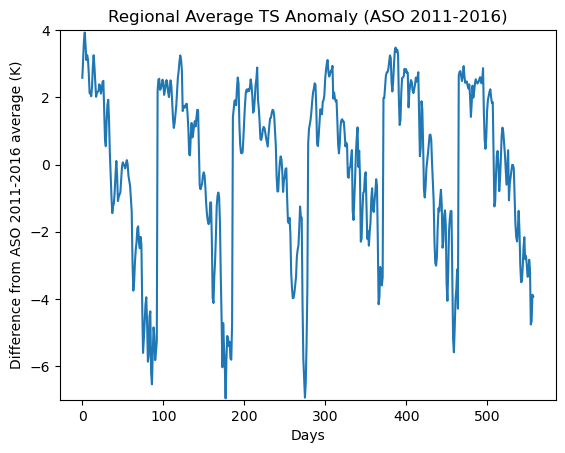

In [77]:
plt.plot(np.arange(0,558,1),ts_anomaly)
plt.ylim(np.floor(min(ts_anomaly)), np.ceil(max(ts_anomaly))) 
plt.title("Regional Average TS Anomaly (ASO 2011-2016)")
plt.xlabel("Days") 
plt.ylabel(u"Difference from ASO 2011-2016 average (K)") 
plt.show()

### Contour Plot

In [73]:
regional_avg_ts1 = np.mean(ds_ts.ts[:,:,:],axis=0)

In [74]:
avg1_ts = np.mean(regional_avg_ts1[:,:])

In [75]:
ts_anomaly1 = regional_avg_ts1 - avg1_ts

In [85]:
ts_anomaly1

<xarray.DataArray 'ts' (latitude: 53, longitude: 89)>
array([[-3.48054579, -4.51292056, -4.64087744, ...,  0.03452121,
        -0.09447543, -0.2274771 ],
       [-2.8230146 , -4.5043407 , -5.04716333, ...,  0.04333854,
        -0.13360616, -0.30490108],
       [-2.13281321, -2.53830573, -2.64575169, ..., -0.01328789,
        -0.18199773, -0.35001735],
       ...,
       [ 1.92809212,  1.9337418 ,  1.92951684, ...,  1.67478538,
         1.66570826,  1.65754968],
       [ 1.92483492,  1.92602675,  1.91988448, ...,  1.67555588,
         1.66779153,  1.65906867],
       [ 1.91665419,  1.91310544,  1.9043958 , ...,  1.66815454,
         1.66319934,  1.65139382]])
Coordinates:
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0

''

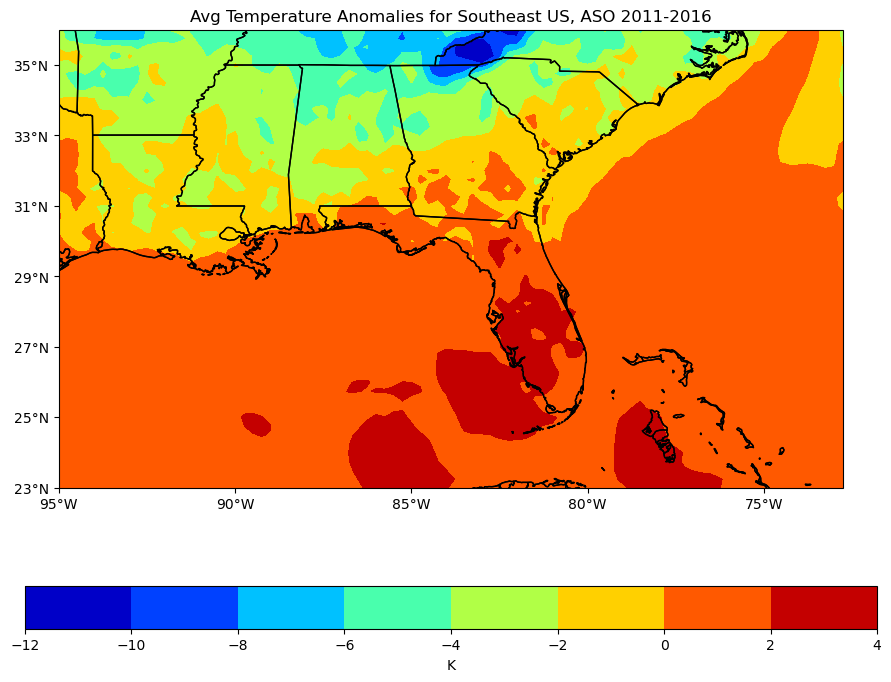

In [76]:
fig = plt.figure(figsize=(11,8.5))

ax=plt.axes(projection=ccrs.PlateCarree())

#add cyclic point to data
data=ts_anomaly1
data, lons = add_cyclic_point(data, coord=ts_anomaly1['longitude'])

cs=ax.contourf(lons, ts_anomaly1['latitude'], data, 
            transform = ccrs.PlateCarree(),cmap='jet')

ax.coastlines()
ax.add_feature(feature.STATES)

ax.set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

cbar = plt.colorbar(cs, orientation='horizontal',label='K') 

plt.title('Avg Temperature Anomalies for Southeast US, ASO 2011-2016')
;

In [80]:
ts_anom_month = ds_ts.groupby('time.month')-ts_clim_month

In [81]:
ts_anom_month

<xarray.Dataset>
Dimensions:    (time: 558, latitude: 53, longitude: 89)
Coordinates:
  * time       (time) datetime64[ns] 2011-08-01 2011-08-02 ... 2016-10-31
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0
    month      (time) int64 8 8 8 8 8 8 8 8 8 8 ... 10 10 10 10 10 10 10 10 10
Data variables:
    ts         (time, latitude, longitude) float64 1.823 2.738 ... -0.3586

In [90]:
ts_1 = ts_anom_month.ts[0,:,:]

''

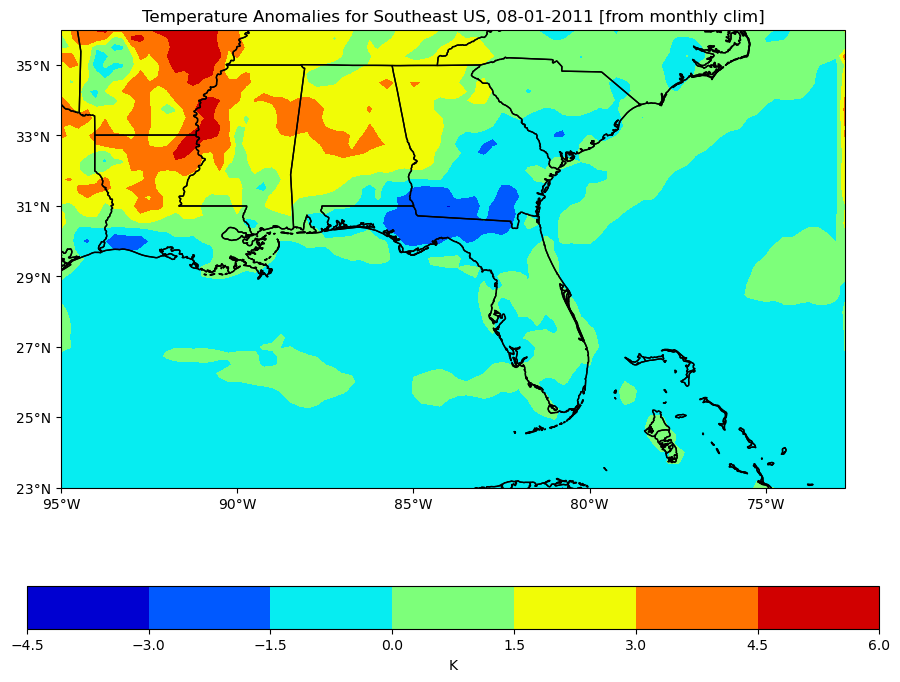

In [94]:
fig = plt.figure(figsize=(11,8.5))

ax=plt.axes(projection=ccrs.PlateCarree())

#add cyclic point to data
data=ts_1
data, lons = add_cyclic_point(data, coord=ts_1['longitude'])

cs=ax.contourf(lons, ts_1['latitude'], data, 
            transform = ccrs.PlateCarree(),cmap='jet')

ax.coastlines()
ax.add_feature(feature.STATES)

ax.set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

cbar = plt.colorbar(cs, orientation='horizontal',label='K') 

plt.title('Temperature Anomalies for Southeast US, 08-01-2011 [from monthly clim]')
;

In [96]:
ts_2 = ts_anom_month.ts[557,:,:]

''

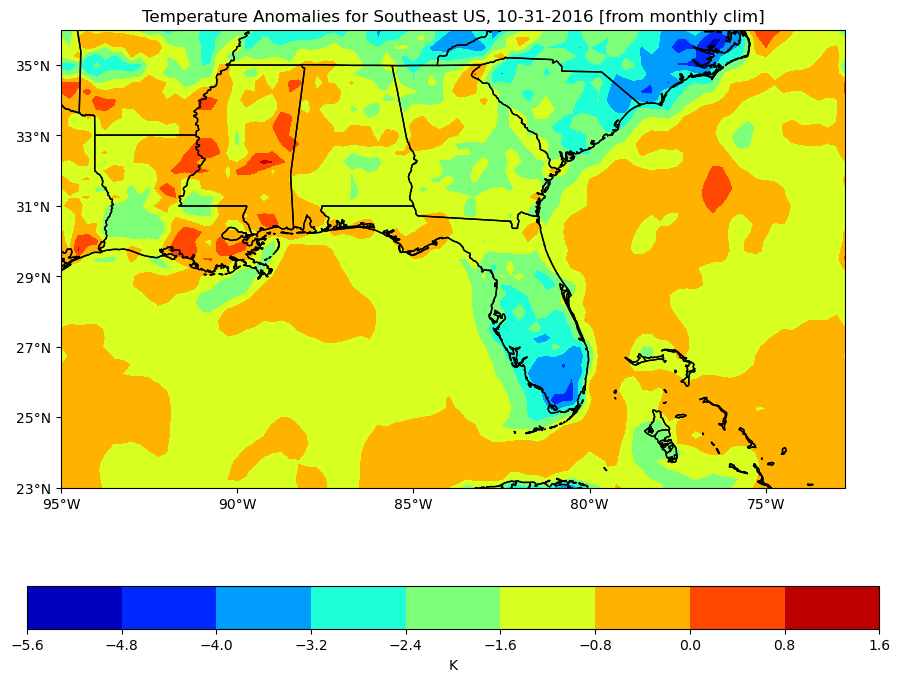

In [98]:
fig = plt.figure(figsize=(11,8.5))

ax=plt.axes(projection=ccrs.PlateCarree())

#add cyclic point to data
data=ts_2
data, lons = add_cyclic_point(data, coord=ts_2['longitude'])

cs=ax.contourf(lons, ts_2['latitude'], data, 
            transform = ccrs.PlateCarree(),cmap='jet')

ax.coastlines()
ax.add_feature(feature.STATES)

ax.set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

cbar = plt.colorbar(cs, orientation='horizontal',label='K') 

plt.title('Temperature Anomalies for Southeast US, 10-31-2016 [from monthly clim]')
;

In [99]:
ts_anom_year = ds_ts.groupby('time.year')-ts_clim_year

In [100]:
ts_anom_year

<xarray.Dataset>
Dimensions:    (time: 558, latitude: 53, longitude: 89)
Coordinates:
  * time       (time) datetime64[ns] 2011-08-01 2011-08-02 ... 2016-10-31
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0
    year       (time) int64 2011 2011 2011 2011 2011 ... 2016 2016 2016 2016
Data variables:
    ts         (time, latitude, longitude) float64 7.176 7.486 ... -0.5785

In [101]:
ts_3 = ts_anom_year.ts[0,:,:]

''

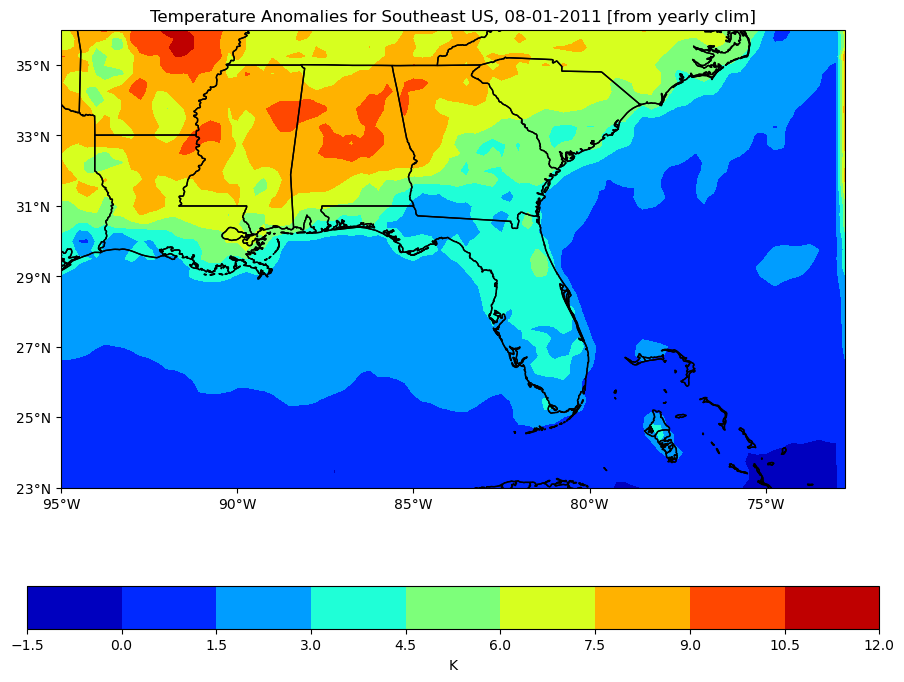

In [102]:
fig = plt.figure(figsize=(11,8.5))

ax=plt.axes(projection=ccrs.PlateCarree())

#add cyclic point to data
data=ts_3
data, lons = add_cyclic_point(data, coord=ts_3['longitude'])

cs=ax.contourf(lons, ts_3['latitude'], data, 
            transform = ccrs.PlateCarree(),cmap='jet')

ax.coastlines()
ax.add_feature(feature.STATES)

ax.set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

cbar = plt.colorbar(cs, orientation='horizontal',label='K') 

plt.title('Temperature Anomalies for Southeast US, 08-01-2011 [from yearly clim]')
;

In [103]:
ts_4 = ts_anom_year.ts[557,:,:]

''

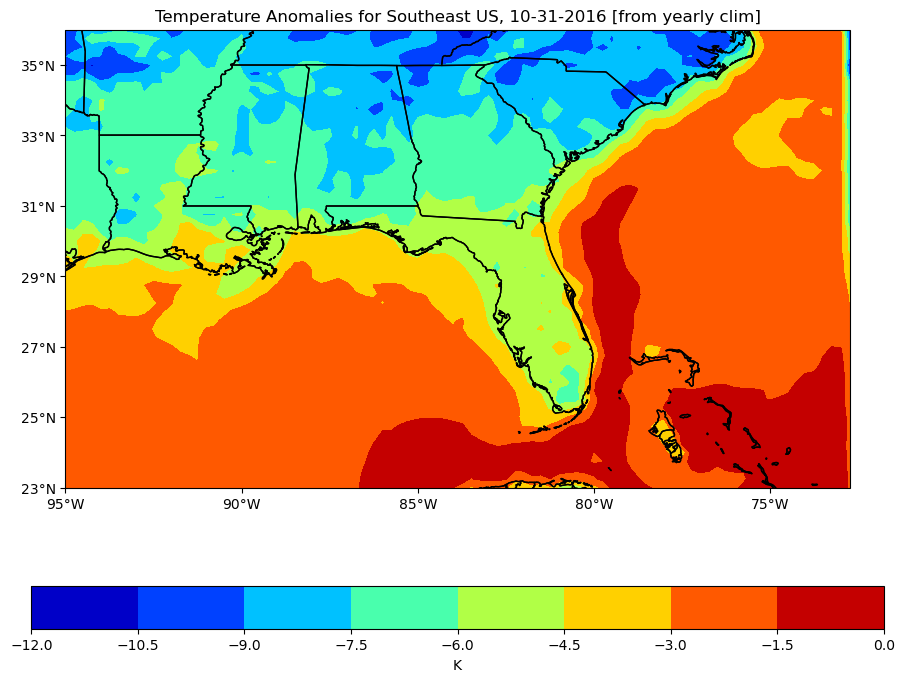

In [104]:
fig = plt.figure(figsize=(11,8.5))

ax=plt.axes(projection=ccrs.PlateCarree())

#add cyclic point to data
data=ts_4
data, lons = add_cyclic_point(data, coord=ts_4['longitude'])

cs=ax.contourf(lons, ts_4['latitude'], data, 
            transform = ccrs.PlateCarree(),cmap='jet')

ax.coastlines()
ax.add_feature(feature.STATES)

ax.set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

cbar = plt.colorbar(cs, orientation='horizontal',label='K') 

plt.title('Temperature Anomalies for Southeast US, 10-31-2016 [from yearly clim]')
;

## Precipitation Anomalies

In [105]:
precip_anom_month = ds_precip.groupby('time.month')-precip_clim_month

In [106]:
precip_anom_month

<xarray.Dataset>
Dimensions:    (time: 558, latitude: 53, longitude: 89)
Coordinates:
  * time       (time) datetime64[ns] 2011-08-01 2011-08-02 ... 2016-10-31
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0
    month      (time) int64 8 8 8 8 8 8 8 8 8 8 ... 10 10 10 10 10 10 10 10 10
Data variables:
    precip     (time, latitude, longitude) float64 -0.8117 -0.812 ... -8.189

In [108]:
precip_1 = precip_anom_month.precip[0,:,:]

''

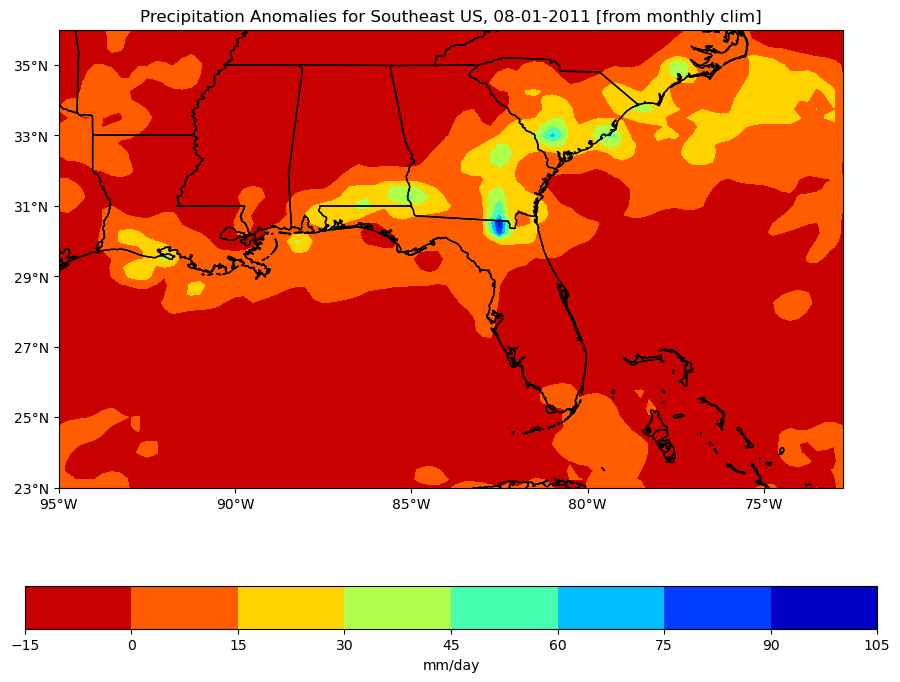

In [110]:
fig = plt.figure(figsize=(11,8.5))

ax=plt.axes(projection=ccrs.PlateCarree())

#add cyclic point to data
data=precip_1
data, lons = add_cyclic_point(data, coord=precip_1['longitude'])

cs=ax.contourf(lons, precip_1['latitude'], data, 
            transform = ccrs.PlateCarree(),cmap='jet_r')

ax.coastlines()
ax.add_feature(feature.STATES)

ax.set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

cbar = plt.colorbar(cs, orientation='horizontal',label='mm/day') 

plt.title('Precipitation Anomalies for Southeast US, 08-01-2011 [from monthly clim]')
;

In [111]:
precip_2 = precip_anom_month.precip[557,:,:]

''

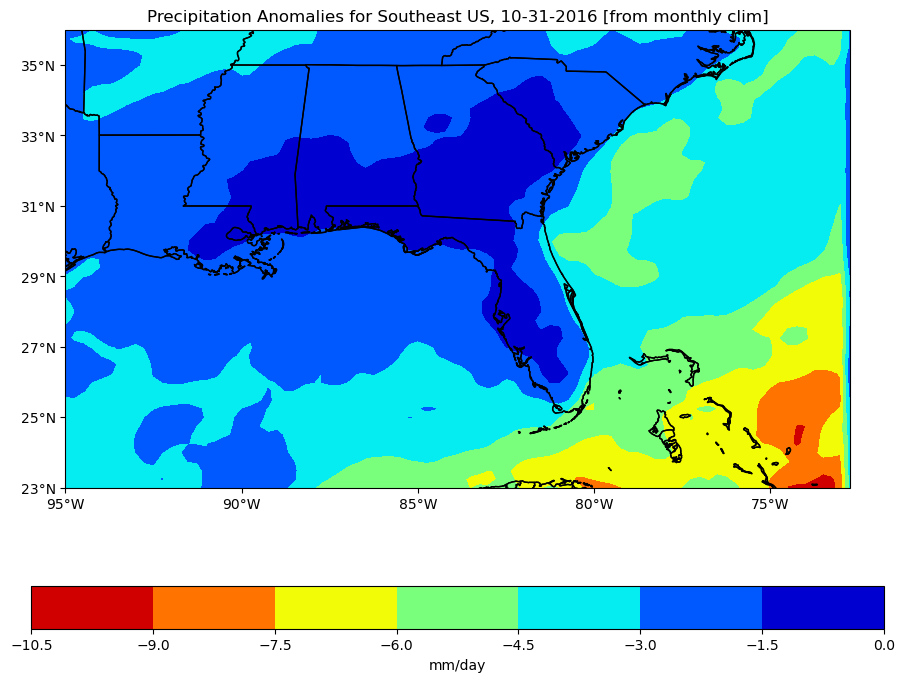

In [112]:
fig = plt.figure(figsize=(11,8.5))

ax=plt.axes(projection=ccrs.PlateCarree())

#add cyclic point to data
data=precip_2
data, lons = add_cyclic_point(data, coord=precip_2['longitude'])

cs=ax.contourf(lons, precip_2['latitude'], data, 
            transform = ccrs.PlateCarree(),cmap='jet_r')

ax.coastlines()
ax.add_feature(feature.STATES)

ax.set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

cbar = plt.colorbar(cs, orientation='horizontal',label='mm/day') 

plt.title('Precipitation Anomalies for Southeast US, 10-31-2016 [from monthly clim]')
;

In [114]:
precip_3 = precip_anom_month.precip[543,:,:]

''

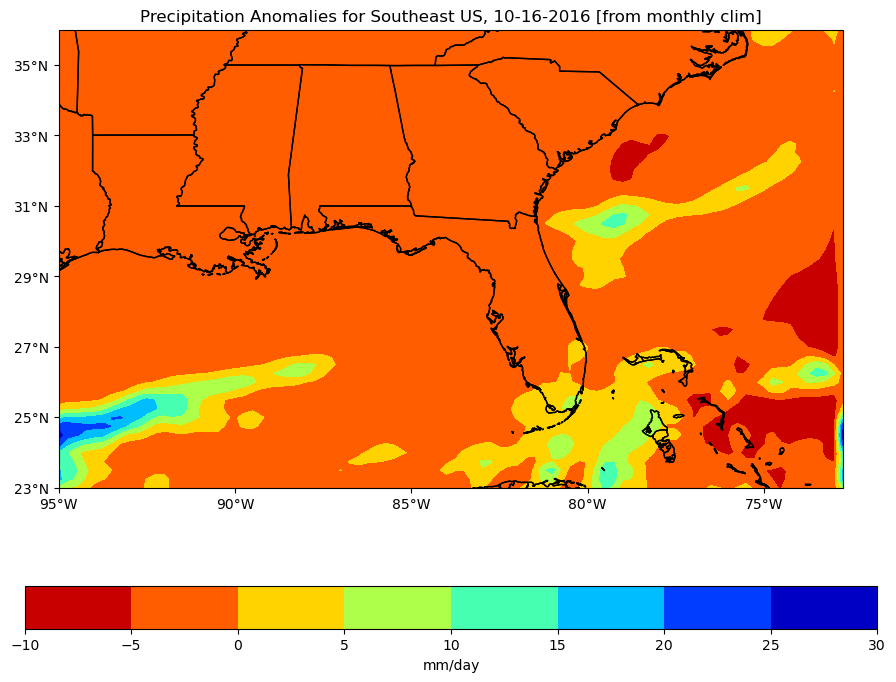

In [115]:
fig = plt.figure(figsize=(11,8.5))

ax=plt.axes(projection=ccrs.PlateCarree())

#add cyclic point to data
data=precip_3
data, lons = add_cyclic_point(data, coord=precip_3['longitude'])

cs=ax.contourf(lons, precip_3['latitude'], data, 
            transform = ccrs.PlateCarree(),cmap='jet_r')

ax.coastlines()
ax.add_feature(feature.STATES)

ax.set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

cbar = plt.colorbar(cs, orientation='horizontal',label='mm/day') 

plt.title('Precipitation Anomalies for Southeast US, 10-16-2016 [from monthly clim]')
;

In [14]:
z500_anom_year = ds_z500.groupby('time.year')-z500_clim_year

In [15]:
z500_anom_year

<xarray.Dataset>
Dimensions:    (time: 558, latitude: 53, longitude: 89)
Coordinates:
  * time       (time) datetime64[ns] 2011-08-01 2011-08-02 ... 2016-10-31
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0
    year       (time) int64 2011 2011 2011 2011 2011 ... 2016 2016 2016 2016
Data variables:
    z500       (time, latitude, longitude) float64 108.0 108.3 ... -22.66 -22.97

In [61]:
z500_mon1 = ds_z500.resample(time="MS").mean()

In [62]:
z500_mon1

<xarray.Dataset>
Dimensions:    (time: 63, latitude: 53, longitude: 89)
Coordinates:
  * time       (time) datetime64[ns] 2011-08-01 2011-09-01 ... 2016-10-01
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0
Data variables:
    z500       (time, latitude, longitude) float64 5.913e+03 ... 5.871e+03

In [109]:
def is_ASO(month):
    return (month >= 8) & (month <= 10)
z500_monthly = z500_mon1.sel(time=is_ASO(z500_mon1['time.month']))

In [110]:
z500_monthly

<xarray.Dataset>
Dimensions:    (time: 18, latitude: 53, longitude: 89)
Coordinates:
  * time       (time) datetime64[ns] 2011-08-01 2011-09-01 ... 2016-10-01
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0
Data variables:
    z500       (time, latitude, longitude) float64 5.913e+03 ... 5.871e+03

In [65]:
clim_z500 = z500_monthly['z500'].groupby('time.month').mean()
clim_z500

<xarray.DataArray 'z500' (month: 3, latitude: 53, longitude: 89)>
array([[[5919.15555958, 5918.81867899, 5918.50028811, ...,
         5889.03978967, 5888.96925403, 5888.90429622],
        [5919.90791895, 5919.593687  , 5919.28620894, ...,
         5890.88800574, 5890.83446544, 5890.80143885],
        [5920.51660616, 5920.20618004, 5919.89895006, ...,
         5892.69338694, 5892.65327109, 5892.63664065],
        ...,
        [5903.9181151 , 5903.94145941, 5903.97233729, ...,
         5912.25340944, 5912.38354689, 5912.51860194],
        [5903.18031426, 5903.22743865, 5903.25926684, ...,
         5911.80795846, 5911.93252137, 5912.05604077],
        [5902.40736504, 5902.47467697, 5902.51967301, ...,
         5911.34631545, 5911.46129255, 5911.58079873]],

       [[5879.05636664, 5878.73282471, 5878.42056953, ...,
         5867.05547824, 5867.09493069, 5867.15431858],
        [5880.26312527, 5879.93728841, 5879.64087796, ...,
         5868.54705268, 5868.58555976, 5868.64156969],
        [5881.395617  , 5881.05454305, 5880.71825901, ...,
         5869.96935221, 5870.00359429, 5870.05380113],
...
        [5888.92215983, 5889.00751275, 5889.0746738 , ...,
         5895.33088311, 5895.50784912, 5895.67788018],
        [5888.71493666, 5888.84934896, 5888.95492757, ...,
         5895.34182197, 5895.51477119, 5895.67837321],
        [5888.5301534 , 5888.69568346, 5888.81560059, ...,
         5895.3115682 , 5895.48759901, 5895.64640774]],

       [[5781.67748833, 5781.28637632, 5780.92348671, ...,
         5794.40885099, 5795.17200279, 5795.95991262],
        [5785.40228844, 5785.02979533, 5784.70218786, ...,
         5797.74884987, 5798.5136617 , 5799.2866567 ],
        [5789.04806137, 5788.66061783, 5788.2907149 , ...,
         5801.01648458, 5801.76888021, 5802.51876132],
        ...,
        [5876.4505469 , 5876.38864072, 5876.32098961, ...,
         5875.39335569, 5875.70093028, 5875.97319285],
        [5876.83447266, 5876.77076976, 5876.70122782, ...,
         5875.73920949, 5876.06580607, 5876.34634717],
        [5877.16407776, 5877.09659131, 5877.03557205, ...,
         5876.17476209, 5876.44957987, 5876.71496518]]])
Coordinates:
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0
  * month      (month) int64 8 9 10

In [66]:
z500_anom = z500_monthly['z500'].groupby('time.month') - clim_z500

In [67]:
z500_anom

<xarray.DataArray 'z500' (time: 18, latitude: 53, longitude: 89)>
array([[[ -6.50283387,  -6.54722218,  -6.57627491, ...,  -7.81025811,
          -7.88375756,  -8.03445467],
        [ -6.03212746,  -6.08688256,  -6.1223197 , ...,  -7.19993476,
          -7.30558203,  -7.46980926],
        [ -5.61482551,  -5.61342629,  -5.62684352, ...,  -6.71226058,
          -6.83083614,  -6.98066236],
        ...,
        [ -5.97650015,  -6.06580968,  -6.16473979, ...,  -2.16776333,
          -2.30725295,  -2.44489904],
        [ -5.96161545,  -6.08709717,  -6.19103348, ...,  -2.43341524,
          -2.55718666,  -2.69313361],
        [ -5.93991844,  -6.05545602,  -6.14580314, ...,  -2.7119436 ,
          -2.82385713,  -2.94949833]],

       [[ -4.95798611,  -4.66493734,  -4.35005358, ..., -26.75976698,
         -27.00154283, -27.23291965],
        [ -5.38725043,  -5.1129069 ,  -4.81896634, ..., -27.1426378 ,
         -27.38767565, -27.6216885 ],
        [ -5.79942559,  -5.54066366,  -5.2522149 , ..., -27.50761312,
         -27.77336561, -27.97926093],
...
        [  8.99088135,   8.61000841,   8.24367337, ...,   0.51514553,
           0.75084229,   0.97163561],
        [  8.89491848,   8.45952555,   8.06575521, ...,   0.33371107,
           0.53860609,   0.73280436],
        [  8.73300985,   8.2888421 ,   7.89711507, ...,   0.12446696,
           0.32144233,   0.46095717]],

       [[ 30.57773399,  30.04526583,  29.52705956, ..., -37.75251706,
         -37.68785667, -37.52906545],
        [ 30.1171627 ,  29.5851148 ,  29.02899806, ..., -37.25235176,
         -37.20124181, -37.03049978],
        [ 29.6104393 ,  29.07447052,  28.49216779, ..., -36.59719213,
         -36.56644567, -36.45213763],
        ...,
        [  2.3361009 ,   2.27879397,   2.19394875, ...,  -6.3476518 ,
          -6.24005763,  -6.08687083],
        [  2.02481842,   1.96493657,   1.89728673, ...,  -6.22836431,
          -6.12744395,  -5.9757913 ],
        [  1.73443604,   1.6789786 ,   1.61264801, ...,  -6.23028882,
          -6.0880839 ,  -5.93160947]]])
Coordinates:
  * time       (time) datetime64[ns] 2011-08-01 2011-09-01 ... 2016-10-01
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0
    month      (time) int64 8 9 10 8 9 10 8 9 10 8 9 10 8 9 10 8 9 10

In [82]:
#to plot anomalies as time series:
regional_avg_z500 = np.mean(z500_monthly.z500[:,:,:],axis=(1,2))

In [83]:
regional_avg_z500

<xarray.DataArray 'z500' (time: 18)>
array([5907.52060275, 5870.49940068, 5825.10402929, 5911.68195636,
       5889.0373768 , 5838.8089002 , 5903.7178065 , 5875.45989465,
       5842.0555429 , 5910.18498339, 5884.13509613, 5861.45749881,
       5916.23306907, 5894.87148274, 5850.37081232, 5917.02628023,
       5898.20566623, 5840.40033193])
Coordinates:
  * time     (time) datetime64[ns] 2011-08-01 2011-09-01 ... 2016-10-01

In [97]:
avg = np.mean(regional_avg_z500[:])

In [96]:
avg

<xarray.DataArray 'z500' ()>
array(5882.13943524)

In [98]:
z500_anomaly = regional_avg_z500 - avg

In [99]:
z500_anomaly

<xarray.DataArray 'z500' (time: 18)>
array([ 27.70000659,  -9.32119548, -54.71656687,  31.8613602 ,
         9.21678063, -41.01169596,  23.89721034,  -4.36070151,
       -37.76505326,  30.36438722,   4.31449996, -18.36309735,
        36.4124729 ,  15.05088657, -29.44978385,  37.20568406,
        18.38507007, -39.42026424])
Coordinates:
  * time     (time) datetime64[ns] 2011-08-01 2011-09-01 ... 2016-10-01

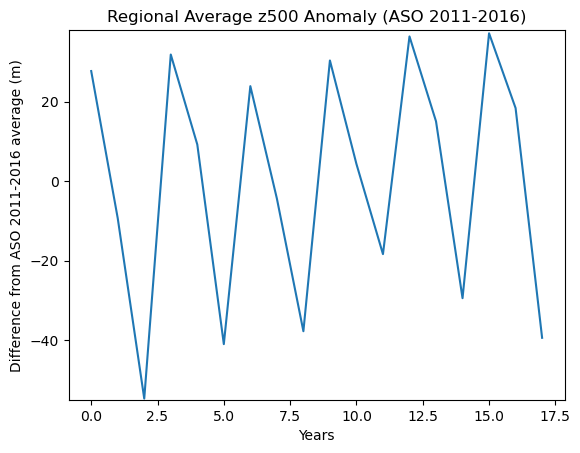

In [106]:
plt.plot(np.arange(0,18,1),z500_anomaly)
plt.ylim(np.floor(min(z500_anomaly)), np.ceil(max(z500_anomaly))) 
plt.title("Regional Average z500 Anomaly (ASO 2011-2016)")
plt.xlabel("Years") 
plt.ylabel(u"Difference from ASO 2011-2016 average (m)") 
plt.show()

In [112]:
regional_avg_z5001 = np.mean(z500_monthly.z500[:,:,:],axis=0)

In [113]:
regional_avg_z5001

<xarray.DataArray 'z500' (latitude: 53, longitude: 89)>
array([[5859.96313818, 5859.61262667, 5859.28144812, ..., 5850.16803963,
        5850.41206251, 5850.67284247],
       [5861.85777755, 5861.52025691, 5861.20975825, ..., 5852.3946361 ,
        5852.6445623 , 5852.90988841],
       [5863.65342818, 5863.30711364, 5862.96930799, ..., 5854.55974124,
        5854.80858186, 5855.06973437],
       ...,
       [5889.76360728, 5889.77920429, 5889.78933357, ..., 5894.32588275,
        5894.53077543, 5894.72322499],
       [5889.57657452, 5889.61585245, 5889.63847408, ..., 5894.29632997,
        5894.50436621, 5894.69358705],
       [5889.36719873, 5889.42231725, 5889.45694855, ..., 5894.27754858,
        5894.46615715, 5894.64739055]])
Coordinates:
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0

In [115]:
avg1 = np.mean(regional_avg_z5001[:,:])

In [116]:
avg1

<xarray.DataArray 'z500' ()>
array(5879.82059617)

In [117]:
z500_anomaly1 = regional_avg_z5001 - avg1

In [118]:
z500_anomaly1

<xarray.DataArray 'z500' (latitude: 53, longitude: 89)>
array([[-19.85745798, -20.20796949, -20.53914805, ..., -29.65255653,
        -29.40853366, -29.14775369],
       [-17.96281861, -18.30033925, -18.61083791, ..., -27.42596007,
        -27.17603387, -26.91070775],
       [-16.16716799, -16.51348253, -16.85128818, ..., -25.26085492,
        -25.0120143 , -24.7508618 ],
       ...,
       [  9.94301111,   9.95860813,   9.9687374 , ...,  14.50528658,
         14.71017926,  14.90262882],
       [  9.75597836,   9.79525629,   9.81787791, ...,  14.47573381,
         14.68377004,  14.87299089],
       [  9.54660257,   9.60172108,   9.63635238, ...,  14.45695241,
         14.64556098,  14.82679439]])
Coordinates:
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0

''

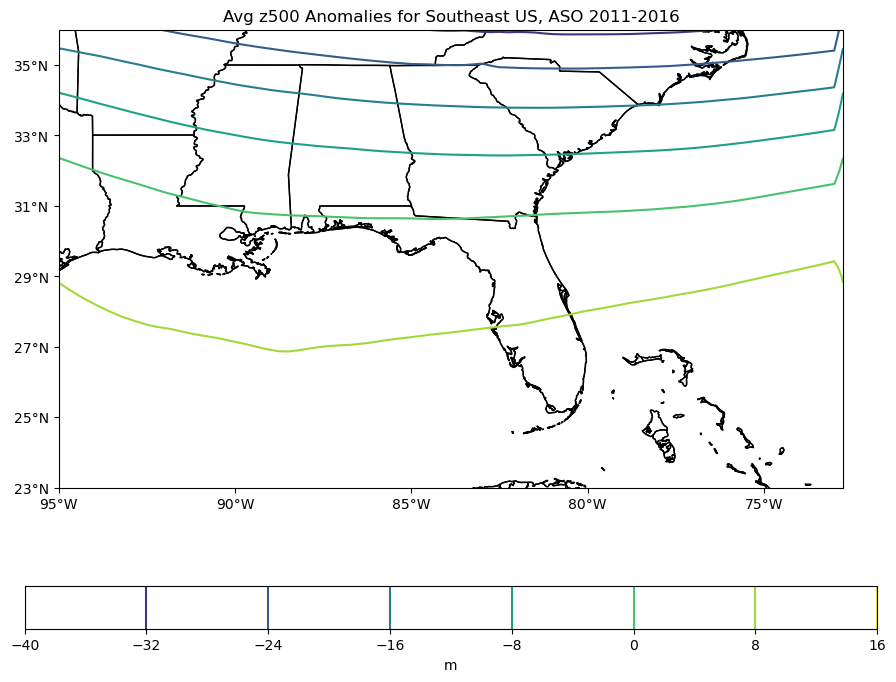

In [122]:
fig = plt.figure(figsize=(11,8.5))

ax=plt.axes(projection=ccrs.PlateCarree())

#add cyclic point to data
data=z500_anomaly1
data, lons = add_cyclic_point(data, coord=z500_anomaly1['longitude'])

cs=ax.contour(lons, z500_anomaly1['latitude'], data, 
            transform = ccrs.PlateCarree(),cmap='viridis')

ax.coastlines()
ax.add_feature(feature.STATES)

ax.set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

cbar = plt.colorbar(cs, orientation='horizontal',label='m') 

plt.title('Avg z500 Anomalies for Southeast US, ASO 2011-2016')
;

TypeError: Input z must be 2D, not 3D

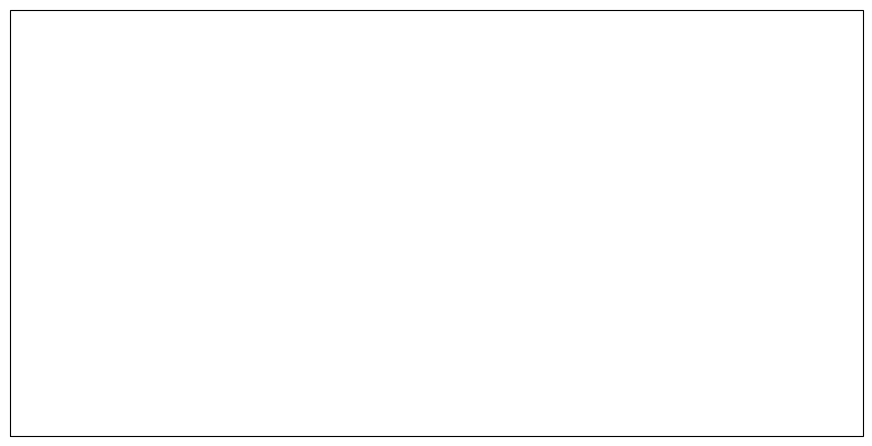

In [49]:
fig = plt.figure(figsize=(11,8.5))

ax=plt.axes(projection=ccrs.PlateCarree())

#add cyclic point to data
data=z500_anom_year['z500']
data, lons = add_cyclic_point(data, coord=z500_anom_year['longitude'])

cs=ax.contour(lons, z500_anom_year['latitude'], data, 
            transform = ccrs.PlateCarree(),cmap='coolwarm', extend='both')

ax.coastlines()

ValueError: x and y must have same first dimension, but have shapes (6,) and (18, 53, 89)

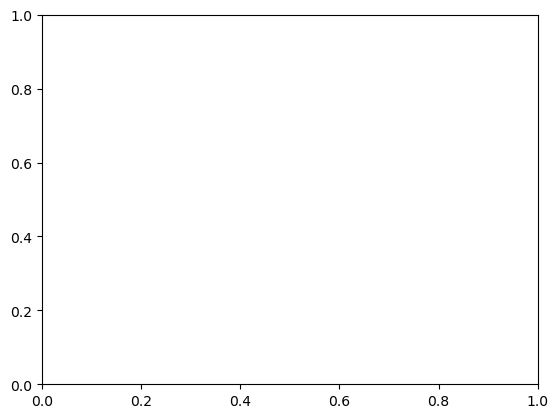

In [69]:
plt.figure()
plt.plot(np.arange(2011,2017,1),z500_anom)
#plt.ylim(np.floor(min(z500_anom)), np.ceil(max(temp_anomaly))) 
#plt.title("Global Average Temperature Anomaly (1901-2017)")
#plt.xlabel("Years") 
#plt.ylabel(u"Difference from 1961-1990 average (\u2103)") 
#plt.text(1985, -0.9, "Data from CRU TS v4.02", fontsize=8)
#plt.show()
#plt.savefig('temp_anom_ts.png')